<a href="https://colab.research.google.com/github/ChaviPalma/Counter-strike-machine-learning/blob/main/Support_Vector_Machine_Counter_Strike_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Support Vector Machine del Target MatchKills



Integrantes:

*   Gonzalo Gallardo
*   Bárbara Palma Mena

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D

## Importar librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


In [ ]:
#Montar drive en el Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Llamar archivo desde el drive
file_path = "/content/drive/MyDrive/Machine Learning/csgo_datos_limpios.csv"
csgo = pd.read_csv(file_path, sep=",")

<ipython-input-6-69c2577f98f5>:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(file_path, sep=",")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Análisis estadístico básico




In [ ]:
csgo.head()

,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


In [ ]:
csgo.columns.tolist()

['Map',
 'Team',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots',
 'TotalGrenades',
 'RoundDeaths',
 'KDR']

In [ ]:
csgo.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0


## Selección de Target y predictor

In [ ]:
# Elegimos como target 'MatchKills' porque representa el rendimiento general del jugador (cantidad total de enemigos eliminados en una partida)
target = 'MatchKills'

# Seleccionamos las variables predictoras más correlacionadas con el rendimiento del jugador:
# - MatchHeadshots: mide la precisión del jugador.
# - RoundId: se relaciona con la duración o número de rondas jugadas.
# - MatchFlankKills: indica su habilidad táctica.
# - MatchAssists: refleja su participación en equipo.
predictors = ['MatchHeadshots', 'RoundId', 'MatchFlankKills', 'MatchAssists']

# Se crean los conjuntos de variables predictoras (X) y de salida (y)
X = csgo[predictors]
y = csgo[target]

print(X)
print(y)


       MatchHeadshots  RoundId  MatchFlankKills  MatchAssists
0                   0        1                0             0
1                   0        1                0             0
2                   0        1                0             0
3                   0        1                0             0
4                   0        1                0             0
...               ...      ...              ...           ...
79152               2        5                0             2
79153               3        5                5             1
79154               3        5                0             2
79155               0        5                0             1
79156               2        5                1             1

[79157 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
79152    4
79153    8
79154    5
79155    1
79156    5
Name: MatchKills, Length: 79157, dtype: int64


## Dividiendo el csv para entrenamiento y pruebas

In [ ]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento
#Random_state garantiza que la partición sea la misma cada vez que se ejecute el notebook si se usa el mismo número en este caso 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear el modelo SVM para regresión
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

##Evaluación del modelo

In [ ]:
# Generar las predicciones del modelo SVM usando el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular el MAE: mide en promedio cuánto se equivoca el modelo
mae = mean_absolute_error(y_test, y_pred)

# Calcular el RMSE: penaliza más los errores grandes
rmse = root_mean_squared_error(y_test, y_pred)

# Calcular el R²: qué tan bien explica el modelo la variabilidad del target
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")


MAE:  1.84
RMSE: 2.58
R²:   0.828


## Visualización del modelo


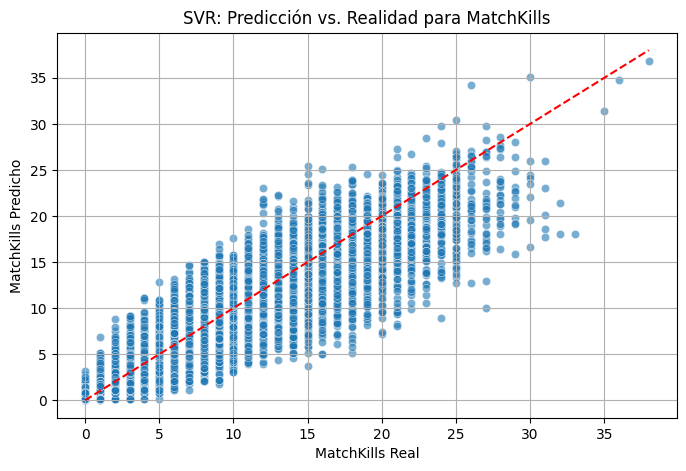

In [ ]:
# Visualización de Predicho vs. Real
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal de referencia
plt.xlabel("MatchKills Real")
plt.ylabel("MatchKills Predicho")
plt.title("SVR: Predicción vs. Realidad para MatchKills")
plt.grid(True)
plt.show()


## Conclusiones

**Métricas**

MAE(1.84)= En promedio, el modelo se está equivocnado por menos de 2 muertes por jugador. Lo cual indica que las predicciones que se hicieron fueron de alta precisión y que el modelo se desempeña bien en la tarea de predecir el número de muertes por jugador(MatchKills)

RMSE(2.58)= Los errores más grandes que comete el modelo se encuentran en un rango relativamente bajo, lo que sugiere que el modelo no presenta grandes desviaciones extremas. Lo cual es consistente con un modelo que generaliza bien a los datos.

R²(0.828)= El 82,8% de la variabilidad en MatchKills es explicada por las variables que son consideradas MatchHeadshots y MatchFlankKills a través del modelo SVM. Lo que demuestra que el modelo SVM tiene una alta capacidad explicativa y que captura de manera efectiva la relación entre las variables independientes y la variable dependiente.

**Análisis visual**

*  El gráfico de dispersión muestra que la mayoria de los puntos reales que son los puntos azules están agrupados alrededor de la línea de predicción que es la línea roja, lo que indica que el modelo SVM se ajusta de manera adecuada a los datos reales.
*  La línea diagonal representa la relación ideal entre las predicciones y los valore reales de MatchKills. La cercanía de los puntos a la línea muetsra que este modelo logra capturar la relación esperada entre las variables de predicción y la cantidad de kills realizadas por los jugadores.
*  La distribución de los puntos refleja una clara tendencia y coherentes con que a mator número de MatchKills reales, mayor es el valor predicho por el modelo SVM. Lo cual confirmaría que el modelo ha aprendido correctamente el patrón general presente en los datos.




